In [1]:
from fastbook import *

/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/koichiro_mori/.fastai/data/mnist_sample')

In [3]:
type(path)

pathlib.PosixPath

In [4]:
path.ls()

(#3) [Path('/home/koichiro_mori/.fastai/data/mnist_sample/train'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/valid'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
threes

(#6131) [Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/koichiro_mori/.fastai/data/mnist_sample/train/7/10086.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(seven_tensors)

6265

In [13]:
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors)

6131

In [14]:
three_tensors[1].shape

torch.Size([28, 28])

<AxesSubplot:>

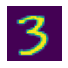

In [15]:
show_image(three_tensors[1])

In [16]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [17]:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [18]:
len(stacked_threes.shape)

3

In [19]:
stacked_threes.ndim

3

In [20]:
mean3 = stacked_threes.mean(0)
mean3.shape

torch.Size([28, 28])

<AxesSubplot:>

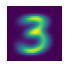

In [21]:
show_image(mean3)

<AxesSubplot:>

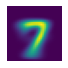

In [22]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

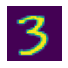

In [23]:
a_3 = stacked_threes[1]
show_image(a_3)

In [24]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3) ** 2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [25]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7) ** 2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [26]:
import torch.nn.functional as F

In [27]:
F.l1_loss(a_3.float(), mean7)

tensor(0.1586)

In [28]:
F.mse_loss(a_3.float(), mean7).sqrt()

tensor(0.3021)

In [29]:
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

In [30]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [32]:
tns[1]

tensor([4, 5, 6])

In [33]:
tns[:, 1]

tensor([2, 5])

In [34]:
tns[1, 1:3]

tensor([5, 6])

In [35]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [36]:
tns.type()

'torch.LongTensor'

In [37]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [38]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / 255
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [39]:
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float() / 255
valid_7_tens.shape

torch.Size([1028, 28, 28])

In [40]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [41]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1164, 0.1465, 0.1170,  ..., 0.1417, 0.1413, 0.1181]),
 torch.Size([1010]))

In [42]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [43]:
mean3.shape

torch.Size([28, 28])

In [44]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [45]:
is_3(a_3)

tensor(True)

In [46]:
is_3(a_3).float()

tensor(1.)

In [47]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [48]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [49]:
accuracy_3s

tensor(0.9168)

In [50]:
accuracy_7s

tensor(0.9854)

In [51]:
(accuracy_3s + accuracy_7s) / 2

tensor(0.9511)

## Stochastic Gradient Descent

In [52]:
def f(x):
    return x ** 2

/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


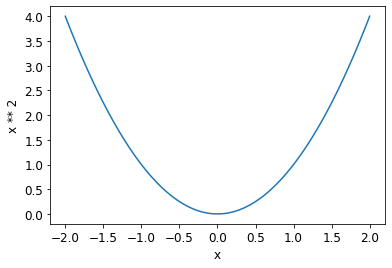

In [53]:
plot_function(f, 'x', 'x ** 2')

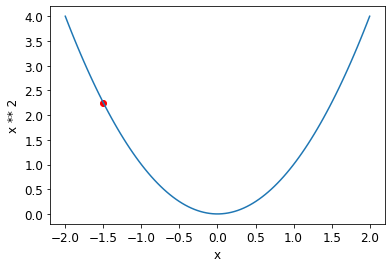

In [54]:
plot_function(f, 'x', 'x ** 2')
plt.scatter(-1.5, f(-1.5), color='red')

In [55]:
xt = tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [56]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [57]:
yt.backward()

In [58]:
xt.grad

tensor(6.)

In [59]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [60]:
def f(x):
    return (x ** 2).sum()

In [61]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [62]:
yt.backward()

In [63]:
xt.grad

tensor([ 6.,  8., 20.])

In [64]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

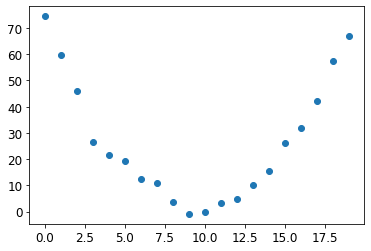

In [65]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed)

In [66]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [67]:
def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

In [68]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [69]:
preds = f(time, params)
preds

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [70]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

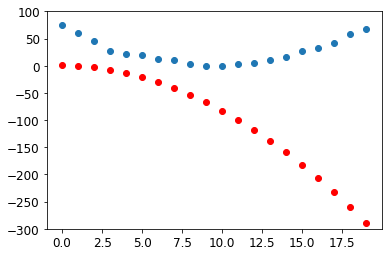

In [71]:
show_preds(preds)

In [72]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [73]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [74]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [75]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [76]:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

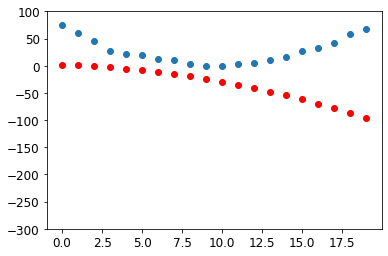

In [77]:
show_preds(preds)

In [78]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

In [79]:
for i in range(10):
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


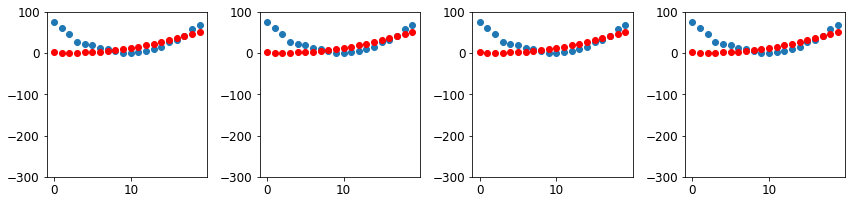

In [81]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

## The MNIST Loss Function

In [82]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [83]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [85]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)
train_x.shape

torch.Size([12396, 784])

In [86]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [87]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [89]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [91]:
x, y = valid_dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [92]:
def init_params(size, std=1.0):
    return (torch.randn(size) * std).requires_grad_()

In [93]:
weights = init_params((28 * 28, 1))
weights.shape

torch.Size([784, 1])

In [94]:
bias = init_params(1)
bias.shape

torch.Size([1])

In [95]:
train_x[0].shape

torch.Size([784])

In [96]:
(train_x[0] * weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [97]:
def linear1(xb):
    return xb @ weights + bias

In [98]:
train_x.shape

torch.Size([12396, 784])

In [99]:
weights.shape

torch.Size([784, 1])

In [100]:
bias.shape

torch.Size([1])

In [101]:
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [102]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [103]:
corrects.float().mean().item()

0.4912068545818329

In [104]:
weights[0] *= 1.0001
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [105]:
targets = tensor([1, 0, 1])
predictions = tensor([0.9, 0.4, 0.2])

In [106]:
def mnist_loss(predictions, targets):
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [107]:
torch.where(targets == 1, 1 - predictions, predictions)

tensor([0.1000, 0.4000, 0.8000])

In [108]:
mnist_loss(predictions, targets)

tensor(0.4333)

In [109]:
mnist_loss(tensor([0.9, 0.4, 0.8]), targets)

tensor(0.2333)

In [110]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

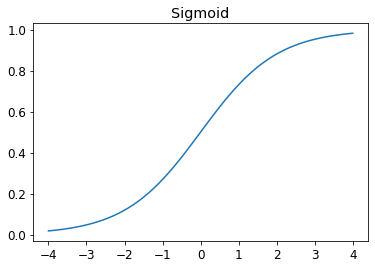

In [111]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [131]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [132]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0,  7,  4,  5, 11]),
 tensor([ 9,  3,  8, 14,  6]),
 tensor([12,  2,  1, 10, 13])]

In [133]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [134]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 6, 14, 12, 15, 24, 11]), ('g', 'o', 'm', 'p', 'y', 'l')),
 (tensor([ 0, 16,  2, 18, 25, 21]), ('a', 'q', 'c', 's', 'z', 'v')),
 (tensor([ 8,  7, 19, 23,  1,  9]), ('i', 'h', 't', 'x', 'b', 'j')),
 (tensor([ 4, 13, 10,  5,  3, 17]), ('e', 'n', 'k', 'f', 'd', 'r')),
 (tensor([22, 20]), ('w', 'u'))]

In [135]:
weights = init_params((28 * 28, 1))
bias = init_params(1)

In [136]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [137]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [138]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [139]:
preds = linear1(batch)
preds

tensor([[ -6.8971],
        [ -5.4541],
        [-13.8578],
        [-14.4878]], grad_fn=<AddBackward0>)

In [140]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9987, grad_fn=<MeanBackward0>)

In [141]:
loss.backward()

In [142]:
weights.grad.shape

torch.Size([784, 1])

In [143]:
weights.grad.mean()

tensor(-0.0002)

In [144]:
bias.grad

tensor([-0.0013])

In [145]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [146]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0004), tensor([-0.0026]))

In [147]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0006), tensor([-0.0039]))

In [148]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [149]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [150]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [151]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [152]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [153]:
validate_epoch(linear1)

0.6473

In [154]:
lr = 1.0
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8042

In [155]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9091 0.9409 0.9545 0.9613 0.9657 0.9687 0.9692 0.9721 0.9731 0.9745 0.976 0.9765 0.9765 0.9765 0.9775 0.9775 0.9779 0.9789 0.9789 0.9794 

In [156]:
linear_model = nn.Linear(28 * 28, 1)
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [157]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [160]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [161]:
opt = BasicOptim(linear_model.parameters(), lr)
opt

In [162]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [163]:
validate_epoch(linear_model)

0.2929

In [164]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [165]:
train_model(linear_model, 20)

0.4932 0.9116 0.7998 0.9048 0.9326 0.9433 0.9546 0.9629 0.9658 0.9668 0.9692 0.9721 0.9736 0.9746 0.976 0.976 0.9775 0.9775 0.978 0.9785 

In [166]:
linear_model = nn.Linear(28 * 28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7739 0.6899 0.8769 0.9199 0.938 0.9511 0.9594 0.9638 0.9663 0.9687 0.9702 0.9721 0.9746 0.9755 0.976 0.9775 0.978 0.978 0.978 

In [167]:
dls = DataLoaders(dl, valid_dl)
dls

In [168]:
learn = Learner(dls, nn.Linear(28 * 28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn

In [169]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636901,0.503495,0.495584,00:00
1,0.521329,0.170616,0.865554,00:00
2,0.191217,0.189423,0.829735,00:00
3,0.083972,0.109457,0.910206,00:00
4,0.044463,0.079112,0.932777,00:00
5,0.029017,0.063061,0.947007,00:00
6,0.022650,0.053135,0.955348,00:00
7,0.019821,0.046567,0.962218,00:00
8,0.018389,0.041976,0.965653,00:00
9,0.017530,0.038608,0.967125,00:00


In [170]:
def simple_net(xb):
    res = sb @ w1 + b1
    res = res.max(tensor(0.0))
    res = res @ w2 + b2
    return res

In [171]:
w1 = init_params((28 * 28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

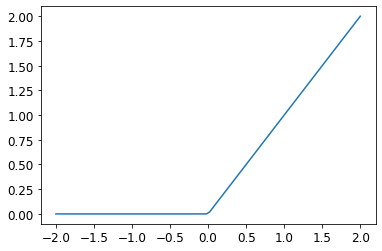

In [172]:
plot_function(F.relu)

In [173]:
simple_net = nn.Sequential(
    nn.Linear(28 * 28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [174]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [175]:
learn = Learner(dls,
                simple_net,
                opt_func=SGD,
                loss_func=mnist_loss,
                metrics=batch_accuracy)

In [176]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.296158,0.403594,0.507360,00:02
1,0.139236,0.223656,0.807164,00:01
2,0.077906,0.113764,0.916094,00:02
3,0.051694,0.077010,0.943081,00:02
4,0.039472,0.060157,0.957311,00:02
5,0.033185,0.050704,0.963199,00:02
6,0.029546,0.044753,0.967615,00:01
7,0.027169,0.040687,0.968597,00:02
8,0.025450,0.037731,0.970069,00:02
9,0.024118,0.035477,0.971050,00:02


In [177]:
learn.recorder

Recorder

In [185]:
L(learn.recorder.values).itemgot(2)

(#40) [0.5073601603507996,0.8071638941764832,0.916094183921814,0.9430814385414124,0.9573110938072205,0.9631991982460022,0.9676153063774109,0.9685966372489929,0.9700686931610107,0.9710500240325928...]

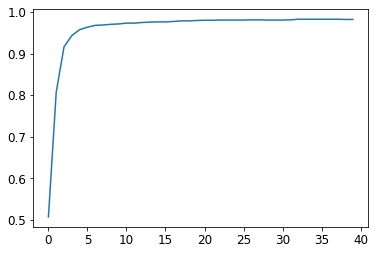

In [187]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [190]:
learn.recorder.values[-1][2]

0.981844961643219

In [191]:
path

Path('/home/koichiro_mori/.fastai/data/mnist_sample')

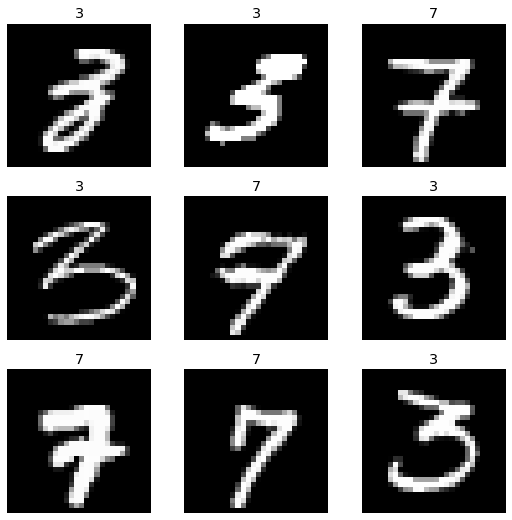

In [192]:
dls = ImageDataLoaders.from_folder(path)
dls.show_batch()

In [194]:
learn = cnn_learner(dls,
                    resnet18,
                    pretrained=False,
                    loss_func=F.cross_entropy,
                    metrics=accuracy)

In [195]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.098309,0.014130,0.997056,00:10


## MNIST

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('/home/koichiro_mori/.fastai/data/mnist_png/training'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing')]

In [4]:
(path / 'training').ls()

(#10) [Path('/home/koichiro_mori/.fastai/data/mnist_png/training/6'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/0'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/4'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/2'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/1'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/3'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/9'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/8'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/5'),Path('/home/koichiro_mori/.fastai/data/mnist_png/training/7')]

In [5]:
(path / 'testing').ls()

(#10) [Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/6'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/0'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/4'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/2'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/1'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/3'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/9'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/8'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/5'),Path('/home/koichiro_mori/.fastai/data/mnist_png/testing/7')]

In [6]:
dls = ImageDataLoaders.from_folder(
    path,
    train='training',
    valid='testing',
    seed=42)

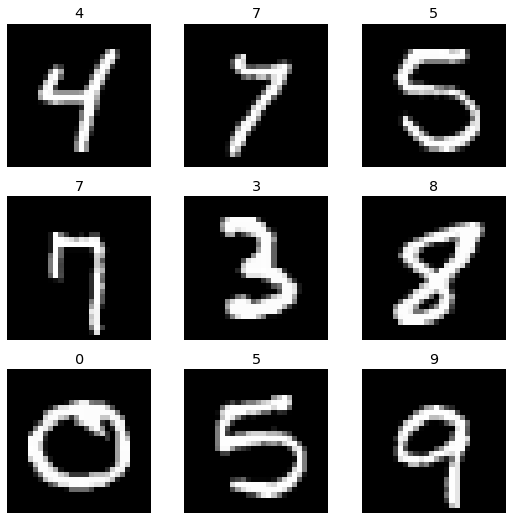

In [7]:
dls.show_batch()

In [9]:
learn = cnn_learner(dls,
                    resnet18,
                    pretrained=False,
                    loss_func=F.cross_entropy,
                    metrics=accuracy)
learn.fit_one_cycle(10, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.290402,0.409642,0.918000,00:44
1,1.082709,27.139099,0.938400,00:39
2,1.082281,0.453638,0.977300,00:39
3,0.949458,0.795382,0.963800,00:39
4,0.657838,140.897156,0.976100,00:39
5,0.408320,0.239131,0.976800,00:40
6,0.248686,0.196153,0.973500,00:39
7,0.058109,0.050102,0.989600,00:39
8,0.025049,0.024824,0.994000,00:40
9,0.014521,0.020390,0.995300,00:40


In [10]:
learn = cnn_learner(dls,
                    resnet18,
                    pretrained=True,
                    loss_func=F.cross_entropy,
                    metrics=accuracy)
learn.fit_one_cycle(10, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.370078,0.214632,0.946400,00:34
1,1.360182,2.317137,0.878500,00:33
2,1.486529,19.786123,0.951600,00:34
3,1.298450,2.073003,0.974500,00:34
4,0.889884,0.302012,0.982600,00:34
5,0.510179,0.307326,0.977700,00:34
6,0.239207,0.215181,0.983400,00:34
7,0.091979,0.051631,0.987000,00:35
8,0.048810,0.272088,0.988000,00:35
9,0.037710,1.897952,0.989400,00:35
